# Clustering: Making Sense of Seemingly Random Data

## Introduction
In this post, we delve into the fascinating world of clustering, a cornerstone of unsupervised learning in machine learning and data science. Clustering helps us find inherent patterns in unlabeled data, grouping similar items together. It has a myriad of applications, from customer segmentation in marketing to image segmentation in computer vision.

## The Fundamentals

### Definition and Purpose

Clustering involves grouping a set of objects such that objects in the same group are more similar to each other than to those in other groups. It's a method to uncover the hidden structure within data.

### Types of Clustering

There are several types of clustering methods:

Partitional Clustering: Divides the dataset into distinct groups.
Hierarchical Clustering: Builds a hierarchy of clusters.
Density-Based Clustering: Forms clusters based on the density of data points.

## The Algorithms

### K-Means Clustering

K-Means is a popular partitional clustering algorithm. It partitions data into 'K' distinct clusters based on their features.

#### Python Example: K-Means Clustering

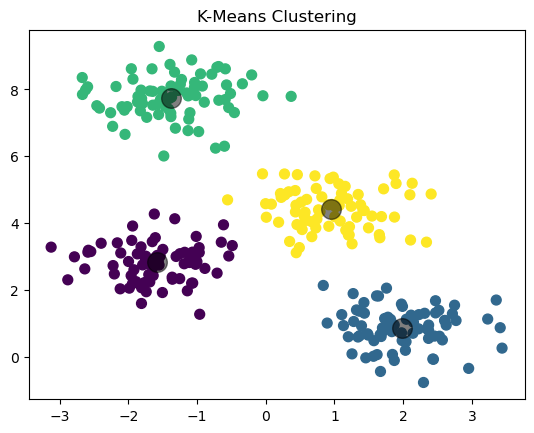

In [4]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Setting environment variable to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

# Generating synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying K-Means with explicit n_init
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("K-Means Clustering")
plt.show()

### Hierarchical Clustering

Hierarchical clustering creates a tree of clusters. It doesn't require us to pre-specify the number of clusters.

#### Python Example: Hierarchical Clustering

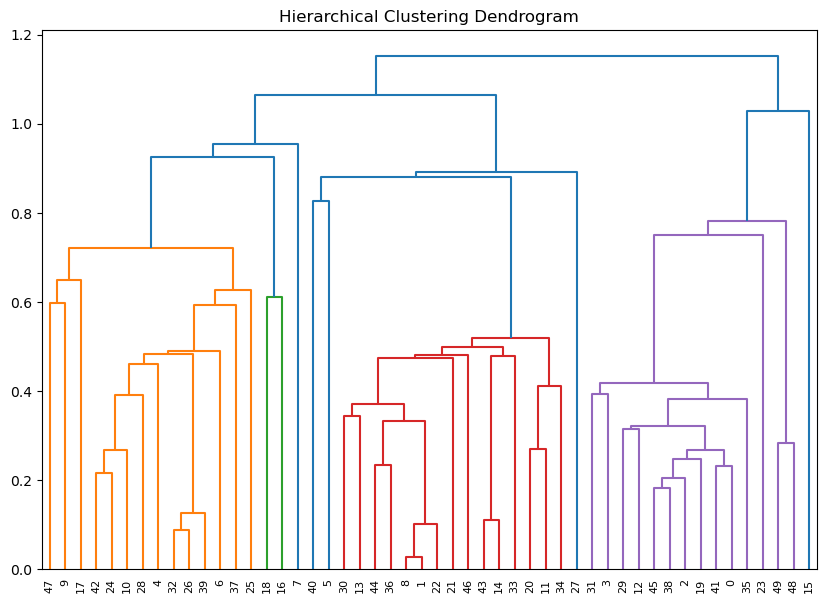

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Generating synthetic data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.70, random_state=0)

# Performing hierarchical clustering
linked = linkage(X, 'single')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is effective in identifying clusters of arbitrary shapes and handling noise.

#### Python Example: DBSCAN

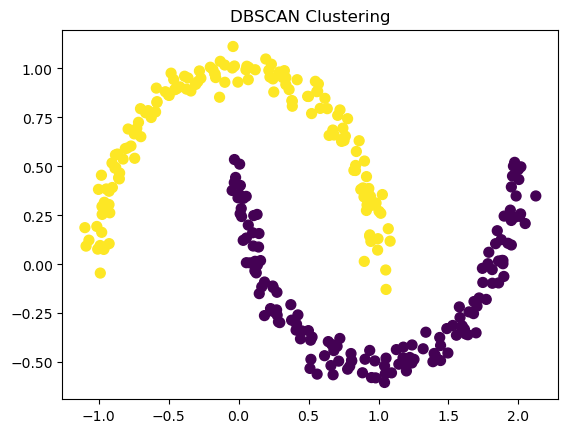

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generating synthetic data (two moons)
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.show()

## Quality Matters

### Silhouette Coefficient

The Silhouette Coefficient is a measure of how similar an object is to its own cluster compared to other clusters.

#### Python Example: Silhouette Coefficient

In [7]:
from sklearn.metrics import silhouette_score

# Assume X and y_kmeans from the K-Means example
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

Silhouette Coefficient: -0.04


We calculate the Silhouette Coefficient for the K-means clustering of our synthetic data. A higher coefficient suggests better-defined clusters.

## Implementation

### Iris Dataset Clustering
The Iris dataset is a classic dataset used in many clustering examples. Here, we apply K-Means to cluster iris flowers based on sepal length and width.

#### Python Example: Iris Dataset with K-Means

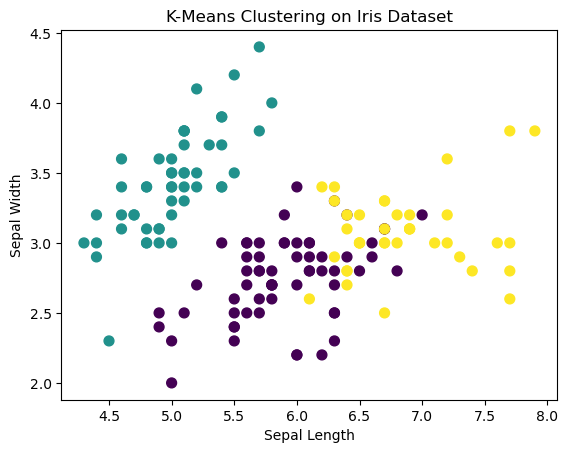

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading the Iris dataset
iris = load_iris()
X = iris.data

# Applying K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

This example shows K-Means clustering on the Iris dataset. The resulting plot helps visualize how the algorithm has grouped the flowers into clusters.

## Conclusion
Clustering is a powerful tool in data analysis, helping us uncover hidden patterns and understand the intrinsic structure of data. While we covered some fundamental clustering techniques, the field is vast, with many more advanced methods and applications. As data continues to grow in size and complexity, the importance and capabilities of clustering algorithms are only set to increase.